<a href="https://colab.research.google.com/github/raiaankur1/Work-with-tensorflow/blob/master/Computer%20Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting with Computer Vision


In [0]:
!pip install tensorflow==2.0.0-alpha0

In [3]:
print(tf.__version__)

2.2.0-rc2


In [0]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Using Fashion_mnist dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

x_train=x_train.reshape(60000,28,28,1)
x_train=x_train/255.0
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test/255.0

model = tf.keras.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])
model.summary()

model.compile(optimizer=tf.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = 'accuracy')

model.fit(x_train,y_train,epochs=5)
model.evaluate(x_test,y_test)

4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
___________________________________________________________

[0.2552528381347656, 0.909600019454956]

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.75):
      print('\nLoss is low so cancelling training!')
      self.model.stop_training=True

In [0]:
callbacks=myCallback()

In [0]:
model.fit(x_train,y_train,epochs=5,callbacks=[callbacks])

Epoch 1/5
1867/1875 [============================>.] - ETA: 0s - loss: 0.2674 - accuracy: 0.9004
Loss is low so cancelling training!
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2675 - accuracy: 0.9003


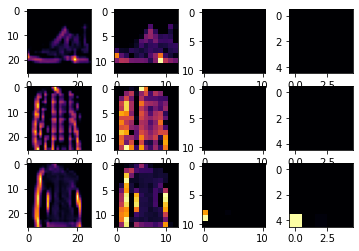

In [11]:
f,axarr = plt.subplots(3,4)
img1 = 0
img2 = 7
img3 = 26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

for x in range(4):
  f1=activation_model.predict(x_test[img1].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0,:,:,CONVOLUTION_NUMBER], cmap=('inferno'))
  axarr[0,x].grid(False)

  f2=activation_model.predict(x_test[img2].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0,:,:,CONVOLUTION_NUMBER],cmap=('inferno'))
  axarr[1,x].grid(False)

  f3=activation_model.predict(x_test[img3].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0,:,:,CONVOLUTION_NUMBER],cmap=('inferno'))
  axarr[2,x].grid(False)


